___
# Ciência dos Dados - PROJETO 2

___
## André Neustein

## Carla Gaieski

___

___

## 1. Problema

O Classificador Naive-Bayes, o qual se baseia no uso do teorema de Bayes, é largamente utilizado em filtros anti-spam de e-mails. O classificador permite calcular qual a probabilidade de uma mensagem ser SPAM considerando as palavras em seu conteúdo e, de forma complementar, permite calcular a probabilidade de uma mensagem ser HAM dada as palavras descritas na mensagem.

Para realizar o MVP (minimum viable product) do projeto, você precisa programar uma versão do classificador que "aprende" o que é uma mensagem SPAM considerando uma base de treinamento e comparar o desempenho dos resultados com uma base de testes. 


___
## 2. Separação da base de dados em Treinamento e Teste

A base de dados deve ser separada em duas partes, aleatoriamente, considerando: 
    
    75% dos dados para a parte Treinamento; e
    25% dos dados para a parte Teste.

In [297]:
import pandas as pd
import os

In [298]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Carla Kim\Desktop\CD\DP\Projeto2-DPCD-master


In [299]:
import math
import matplotlib.pyplot as plt
import json
from random import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

In [300]:
#importando o arquivo
xlsx = pd.read_excel('spamhamV2.xlsx',sep=',')

In [301]:
#separando aleatoriamente 25% em teste e 75% em treinamento
train, test = train_test_split(xlsx, test_size = 0.25)
train.reset_index()
test.reset_index()

,index,Email,Class
0,1064,"That's fine, I'll bitch at you about it later ...",ham
1,3096,"Yo, you at jp and hungry like a mofo?",ham
2,3727,The search 4 happiness is 1 of d main sources ...,ham
3,5496,Yes... I trust u to buy new stuff ASAP so I ca...,ham
4,4493,Man this bus is so so so slow. I think you're ...,ham
5,105,Thanks a lot for your wishes on my birthday. T...,ham
6,3672,Moji just informed me that you saved our lives...,ham
7,201,Hello darlin ive finished college now so txt m...,ham
8,3734,"It‰Û÷s å£6 to get in, is that ok?",ham
9,2059,I did. One slice and one breadstick. Lol,ham


In [302]:
#criando função para limpar os emails
def clean(email):
    email_final = email.replace("."," ").replace(","," ").replace("-"," ")\
    .replace(":"," ").replace(";"," ").replace("…"," ").replace("+"," ").replace('('," ").replace("'"," ").replace('"'," ")\
    .replace(')'," ").replace("@"," ").replace("#"," ").replace('  ',' ').replace('*',' ')
    return email_final

In [303]:
#limpando os emails contidos em treinamento

def limpar(mailtreino):
    trei = mailtreino
    return clean(trei)

LT = train.Email.apply(limpar,1)
train["Email"] = LT
train

C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Email,Class
3685,I get out of class in bsn in like &lt &gt min...,ham
435,The message sent is askin for &lt &gt dollars ...,ham
2352,Please CALL 08712402902 immediately as there i...,spam
5049,I will vote for wherever my heart guides me,ham
4609,Just glad to be talking to you,ham
1662,S but mostly not like that,ham
2102,Its a site to simulate the test It just gives ...,ham
3136,You re right I have now that I think about it,ham
2475,i dnt wnt to tlk wid u,ham
1945,Hey we can go jazz power yoga hip hop kb and y...,ham


___
## 3. Classificador Naive-Bayes

In [304]:
#criando dataframe de spams
trainspam = train.loc[train.Class == 'spam']
trainspam.head(2)

,Email,Class
2352,Please CALL 08712402902 immediately as there i...,spam
3996,Bored housewives! Chat n date now! 0871750 77 ...,spam


In [305]:
#criando dataframe de hams
trainham = train.loc[train.Class == 'ham']
trainham.head(2)

,Email,Class
3685,I get out of class in bsn in like &lt &gt min...,ham
435,The message sent is askin for &lt &gt dollars ...,ham


E-mails HAM:

In [306]:
#soma de tabela de emails ham
soma_ham = pd.Series(np.sum(trainham['Email']+'').split())

In [307]:
#fazendo uma lista de palavras que aparecem nos emails ham
palavras_ham = np.sum(trainham['Email']+'').split()

In [308]:
#calculo do total dos hams
total_ham = len(palavras_ham)

E-mails SPAM:

In [309]:
#soma de tabela spam
soma_spam = pd.Series(np.sum(trainspam['Email']+'').split())

In [310]:
#fazendo uma lista de palavras que aparecem nos spams
palavras_spam = np.sum(trainspam['Email']+'').split()


In [311]:
#calculo do total de spam
total_spam = len(palavras_spam)

Criando o classificador:

In [312]:
def classificador(mail):
    mail = mail.split(' ')
    prob_spam = [] #probabilidade de o email ser spam em train
    prob_ham = [] #probabilidade de o email ser ham em train
    prob_spam.append(train.Class.value_counts()['spam']/len(train))
    prob_ham.append(train.Class.value_counts()['ham']/len(train))
    for i in range(len(mail)):
        prob_spam.append((palavras_spam.count(mail[i])+1)/(total_spam+len(mail)))
        prob_ham.append((palavras_ham.count(mail[i])+1)/(total_ham+len(mail)))
    
    #multiplica os fatores da lista
    SPAM = np.prod(prob_spam)
    HAM = np.prod(prob_ham)
    
    if SPAM > HAM:
        return 'spam'
    else:
        return 'ham'
    

    Com as linhas de "E-mails SPAM" e "E-mails HAM" e a função classificador, foi possível estabelecer o classificador Naive Bayes do programa.
    As linhas de comando anteriores ao "Classificador" estabelecem as listas necessárias para a realização de Bayes.

Testando nosso classificador para nossa base de dados test:

In [313]:
#limpando o dados de teste
def limpando(mailtest):
    walker = mailtest
    return clean(walker)

L = test.Email.apply(limpando,1)
test["Email"] = L

C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [314]:
#função criada para testar nosso classificador
def testando(emailteste):
    oracao = emailteste
    return classificador(oracao)

T = test.Email.apply(testando,1)
test["Resultados"] = T

C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [315]:
#visualizando o resultado do classificador, comparando-o com o dataframe original
test

,Email,Class,Resultados
1064,That s fine I ll bitch at you about it later then,ham,ham
3096,Yo you at jp and hungry like a mofo?,ham,ham
3727,The search 4 happiness is 1 of d main sources ...,ham,ham
5496,Yes I trust u to buy new stuff ASAP so I can ...,ham,ham
4493,Man this bus is so so so slow I think you re g...,ham,ham
105,Thanks a lot for your wishes on my birthday Th...,ham,ham
3672,Moji just informed me that you saved our lives...,ham,ham
201,Hello darlin ive finished college now so txt m...,ham,ham
3734,It‰Û÷s å£6 to get in is that ok?,ham,ham
2059,I did One slice and one breadstick Lol,ham,ham


    Nesta etapa, a função criada para testar o classificador Naive Bayes colocou uma coluna a mais em nosso data frame, denominada "Resultados", que mostram como o código classificou cada tipo de mensagem, de acordo com o treinamento que ele recebeu anteriormete. Assim, realizando uma breve vizualização é possível perceber que houve acertos e alguns erros. Para que esses dados de acertos ou não, também conhecidos como falsos positivos,FP, (mensagens marcadas como SPAM mas que não são SPAM); positivos verdadeiros, PV, (mensagens marcadas como SPAM e são SPAM); falsos negativos, FN, (mensagens marcadas como não SPAM mas são SPAM) e negativos verdadeiros, NV, (mensagens marcadas como não SPAM e não são SPAM), sejam calculados, pode-se utilizar uma crosstab entre a class, que são os dados da base de teste, junto com os dados obtidos em resultados. Assim, podemos vizualizar melhor.

Descobrindo os valores de falsos positivos, positivos verdadeiros, falsos negativos e negativos verdadeiros:

In [363]:
#crosstab para vizualização da tablefa de distribuição conjunta referente à FP, PV, FN e NV
ct = pd.crosstab(test.Class,test.Resultados)
ct

Resultados,ham,spam
Class,,
ham,1102,122
spam,5,164


Calculando todas medidas:

In [354]:
#criando a partir da igualdade de spam e ham entre dados e classificador
test.loc[(test.Class == "spam")& (test.Resultados == "spam"),'Atuaçao'] = 'NV'
test.loc[(test.Class == "ham")& (test.Resultados == "ham"),'Atuaçao'] = 'PV'
test.loc[(test.Class == "spam")& (test.Resultados == "ham"),'Atuaçao'] = 'PF'
test.loc[(test.Class == "ham")& (test.Resultados == "spam"),'Atuaçao'] = 'NF'

NV = test.Atuaçao.value_counts()['NV']

PV = test.Atuaçao.value_counts()['PV']

NF = test.Atuaçao.value_counts()['NF']

PF = test.Atuaçao.value_counts()['PF']


Porcen_NV = (NV/(NV+PV))*100
Porcen_PV = (PV/(NV+PV))*100
Porcen_PF = (PF/(PF+NF))*100
Porcen_NF = (NF/(PF+NF))*100

C:\Users\Carla Kim\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Carla Kim\Anaconda3\lib\site-pa

In [362]:
print("Porcentagem de positivo falso: {0}%\n".format(Porcen_PF))
print("Porcentagem de positivo verdadeiro: {0}%\n".format(Porcen_PV))
print("Porcentagem de negativo verdadeiro: {0}%\n".format(Porcen_NV))
print("Porcentagem de negativo falso: {0}%\n".format(Porcen_NF))

Porcentagem de positivo falso: 3.937007874015748%

Porcentagem de positivo verdadeiro: 87.04581358609794%

Porcentagem de negativo verdadeiro: 12.954186413902052%

Porcentagem de negativo falso: 96.06299212598425%



    Com essas informações obtidas, podemos dizer que para este teste, o classificador obteve uma precisão de 99%, somando positivo e negativo verdadeiro, na classificação dos e-mails. O número de falsos positivos ficou abaixo de 5%, o que é um resultado relativamente bom, pois então, poucos e-mails importantes seriam descartados como spam. No entanto, ainda é uma perda para o destinatário do e-mail. Já a porcentagem de negativos falsos foi bem alta, o que não se espera do Naive Bayes, e torna-se um incômodo ao usuário, que é obrigado a ver Spams em sua caixa de entrada, ao invés de Hams.


___
## 4. Curva ROC

Criando um dataframe a parte somente  de teste

In [326]:
dft = pd.DataFrame(test)
dft.reset_index()

,index,Email,Class,Resultados
0,1064,That s fine I ll bitch at you about it later then,ham,ham
1,3096,Yo you at jp and hungry like a mofo?,ham,ham
2,3727,The search 4 happiness is 1 of d main sources ...,ham,ham
3,5496,Yes I trust u to buy new stuff ASAP so I can ...,ham,ham
4,4493,Man this bus is so so so slow I think you re g...,ham,ham
5,105,Thanks a lot for your wishes on my birthday Th...,ham,ham
6,3672,Moji just informed me that you saved our lives...,ham,ham
7,201,Hello darlin ive finished college now so txt m...,ham,ham
8,3734,It‰Û÷s å£6 to get in is that ok?,ham,ham
9,2059,I did One slice and one breadstick Lol,ham,ham


O mesmo classificador de Naive Bayes é utilizado, no entanto, seu nome e a variável que recebe foram alterados. Assim como as condições para a realização da reta ROC, em que SPAM/(SPAM+HAM) > n, sendo n um número que varía de 0 a 1: 

In [327]:
def classificadoroc(mail):
    mail = mail.split(' ')
    prob_spam = []
    prob_ham = []
    prob_spam.append(train.Class.value_counts()['spam']/len(train))
    prob_ham.append(train.Class.value_counts()['ham']/len(train))
    for i in range(len(mail)):
        prob_spam.append((palavras_spam.count(mail[i])+1)/(total_spam+len(mail)))
        prob_ham.append((palavras_ham.count(mail[i])+1)/(total_ham+len(mail)))
    
    #multiplica os fatores da lista
    SPAM = np.prod(prob_spam)
    HAM = np.prod(prob_ham)
    
    if (SPAM) > n*(SPAM+HAM):
        return 'spam'
    else:
        return 'ham'

O mesmo princípio do teste é aplicado aqui, de forma que cria-se uma nova coluna, com os dados obtidos pelo novo classificador, "classificadorroc".

In [332]:
def rocando(dft):
    periodo = dft.Email
    return classificadoroc(periodo)

n=0.1
P = dft.apply(rocando,1)
dft['BayRoc'] = P
dft.head(2)

,Email,Class,Resultados,BayRoc
1064,That s fine I ll bitch at you about it later then,ham,ham,ham
3096,Yo you at jp and hungry like a mofo?,ham,ham,ham


In [348]:
lx = []#eixox
ly = []#eixoy
coef = []#phi, coeficiente de correlacao

#for n in np.arange(0,1,0.01):
i=1
while i <= 10:
    P = dft.apply(rocando,1)
    test["BayRoc"] = P
    ct = pd.crosstab(dft.Class,dft.BayRoc)
    if hasattr (ct,'ham') and hasattr(ct,'spam'):
        y = ct.spam[1]/(ct.spam[1]+ct.spam[0])
        x = 1-(ct.ham[0]/(ct.ham[1]+ct.ham[0]))
        phi1 = (ct.spam["spam"]*ct.ham["ham"])-(ct.spam["ham"]*ct.ham["spam"])
        phi2 = (ct.spam["spam"]+ct.ham["spam"])*(ct.spam["spam"]+ct.spam["ham"])*(ct.ham["ham"]+ct.ham["spam"])*(ct.ham["ham"]+ct.spam["ham"])
        lx.append(x)
        ly.append(y)
        coef.append(phi1/(phi2**(1/2)))
    elif hasattr (ct,'ham') and not hasattr(ct,'spam'):
        x = 1
        y = 0 
        phi = 0
        lx.append(x)
        ly.append(y)
        coef.append(phi)
    elif hasattr (ct,'ham') and not hasattr(ct,'spam'):
        x = 0
        y = 1 
        phi = 0
        lx.append(x)
        ly.append(y)
        coef.append(phi)
    i+=1  

In [349]:
lx

[0.089869281045751648,
 0.089869281045751648,
 0.089869281045751648,
 0.089869281045751648,
 0.089869281045751648]

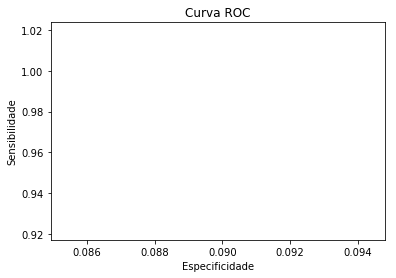

In [350]:
plt.plot(LHAM,LSPAM)
plt.ylabel('Sensibilidade')
plt.xlabel('Especificidade')
plt.title('Curva ROC')
plt.show()

In [351]:
coef

[0.72326134140881893,
 0.72326134140881893,
 0.72326134140881893,
 0.72326134140881893,
 0.72326134140881893]

Nesta etapa de criação da curva ROC o programa não foi capaz de realizar as 100 análises, com n variando entre 0 e 1, de 0,01, devido ao lento processamento dele. Além do fato de que uma pequena amostra, de 5, mostrar que os valores não variam, com isso, pode-se ter realizado algo de errado nos códigos. Dessa forma, não foi possível fazer a curva ROC, que mostraria a especificidade e a sensibilidade de nossos dados. Como também, o coeficiente de correlação de Matthews, que mostraria a curva ideal desejada. Logo, a etapa de qualificar o classificador não é 

___
## 5. Qualidade do Classificador alterando a base de treinamento

In [365]:
SS = []
HH = []

for i in range(100):
    train, test = train_test_split(xlsx, test_size = 0.25)
    train.reset_index()
    test.reset_index()
    
    C = test.Email.apply(testando,1)
    test["Resultados"] = C
    
    ct3 = pd.crosstab(test.Class, test.Resultados)
    xx = ct.spam['spam']/(ct.spam['spam']+ct.spam['ham'])
    yy = ct.ham['ham']/(ct.ham['ham']+ct.ham['spam'])
    SS.append(xx)
    HH.append(yy)

C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


KeyboardInterrupt: 